In [ ]:
# ✅ Paso 1: Instalamos librerías necesarias (solo la primera vez)
!pip install faker

# ✅ Paso 2: Importamos las librerías
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import timedelta, datetime

# ✅ Paso 3: Inicializamos Faker
fake = Faker()

# ✅ Paso 4: Función para generar fechas aleatorias
def random_dates(start, end, n=10):
    return [start + timedelta(seconds=random.randint(0, int((end - start).total_seconds()))) for _ in range(n)]

# ✅ Paso 5: Definimos el tamaño del dataset
n = 1000  # Puedes cambiar este número si quieres más o menos registros

# ✅ Paso 6: Generamos los datos
data = {
    'Order_ID': range(1, n + 1),
    'Product_ID': [random.randint(1, 100) for _ in range(n)],
    'Product_Name': [fake.word().capitalize() for _ in range(n)],
    'Category': [random.choice(['Ropa', 'Electrónica', 'Hogar', 'Alimentos', 'Juguetes']) for _ in range(n)],
    'Price': [round(random.uniform(10, 500), 2) for _ in range(n)],
    'Quantity': [random.randint(1, 5) for _ in range(n)],
    'Date': random_dates(datetime(2023, 1, 1), datetime(2023, 12, 31), n),
    'Region': [random.choice(['Norte', 'Sur', 'Centro']) for _ in range(n)],
    'Customer_Age': [random.randint(18, 65) for _ in range(n)],
    'Customer_Gender': [random.choice(['Masculino', 'Femenino', 'Otro']) for _ in range(n)],
    'Returned': [random.choice([0, 1]) for _ in range(n)],
    'Order_Status': [random.choice(['Enviado', 'Entregado', 'Cancelado']) for _ in range(n)],
}

# ✅ Paso 7: Creamos el DataFrame
df = pd.DataFrame(data)

# ✅ Paso 8: Guardamos como archivo CSV
df.to_csv('ecommerce_sales_data.csv', index=False)

# ✅ Paso 9: Mostramos las primeras filas para revisar
df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.5 MB/s eta 0:00:00


,Order_ID,Product_ID,Product_Name,Category,Price,Quantity,Date,Region,Customer_Age,Customer_Gender,Returned,Order_Status
0,1,10,Early,Juguetes,418.80,3,2023-12-24 06:30:09,Centro,23,Masculino,1,Entregado
1,2,99,Ok,Ropa,394.61,5,2023-07-06 14:07:01,Norte,30,Otro,1,Enviado
2,3,51,Painting,Juguetes,15.16,2,2023-01-09 21:45:09,Sur,39,Otro,1,Entregado
3,4,89,Less,Ropa,310.05,3,2023-06-21 12:53:31,Centro,40,Masculino,0,Cancelado
4,5,60,Alone,Juguetes,450.65,4,2023-11-07 12:00:30,Centro,29,Masculino,1,Entregado


In [ ]:
from google.colab import files
files.download('ecommerce_sales_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Cargamos el dataset
df = pd.read_csv('ecommerce_sales_data.csv')

# Revisamos datos generales
print(df.info())
print(df.describe())

# Verificamos valores nulos
print(df.isnull().sum())

# Verificamos duplicados
print("Duplicados:", df.duplicated().sum())

# Si quieres, eliminamos duplicados (aunque no deberían haber)
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         1000 non-null   int64  
 1   Product_ID       1000 non-null   int64  
 2   Product_Name     999 non-null    object 
 3   Category         1000 non-null   object 
 4   Price            1000 non-null   float64
 5   Quantity         1000 non-null   int64  
 6   Date             1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Customer_Age     1000 non-null   int64  
 9   Customer_Gender  1000 non-null   object 
 10  Returned         1000 non-null   int64  
 11  Order_Status     1000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 93.9+ KB
None
          Order_ID   Product_ID        Price     Quantity  Customer_Age  \
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000   
mean    500.500000    50.929000 

In [ ]:
# Primer vistazo a las categorías de productos
print(df['Category'].value_counts())

# Estado de los pedidos
print(df['Order_Status'].value_counts())

# Devoluciones
print(df['Returned'].value_counts())


Category
Electrónica    208
Hogar          207
Ropa           197
Alimentos      195
Juguetes       193
Name: count, dtype: int64
Order_Status
Enviado      350
Cancelado    330
Entregado    320
Name: count, dtype: int64
Returned
1    519
0    481
Name: count, dtype: int64


In [ ]:
# ✅ Ticket promedio
df['Total'] = df['Price'] * df['Quantity']
ticket_promedio = df['Total'].mean()
print(f"🎟️ Ticket Promedio: ${ticket_promedio:.2f}")

# ✅ Productos más vendidos
productos_mas_vendidos = df.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(10)
print("🏆 Productos más vendidos:")
print(productos_mas_vendidos)

# ✅ Tasa de devolución
tasa_devolucion = (df['Returned'].sum() / len(df)) * 100
print(f"♻️ Tasa de devolución: {tasa_devolucion:.2f}%")


🎟️ Ticket Promedio: $761.95
🏆 Productos más vendidos:
Product_Name
Assume       16
Sort         16
Character    15
Early        15
Maybe        15
So           15
Design       14
President    14
Mr           13
All          13
Name: Quantity, dtype: int64
♻️ Tasa de devolución: 51.90%


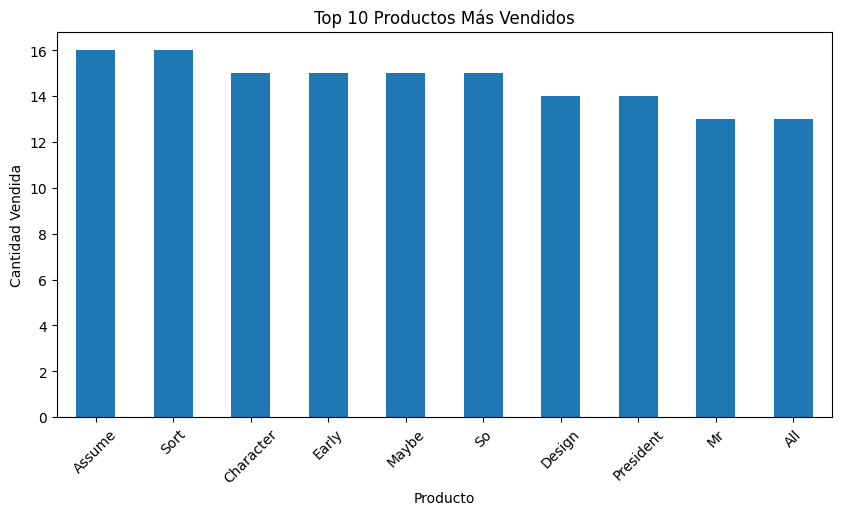

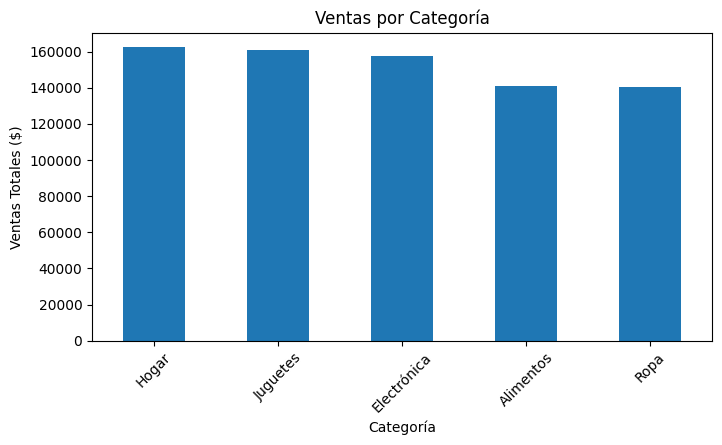

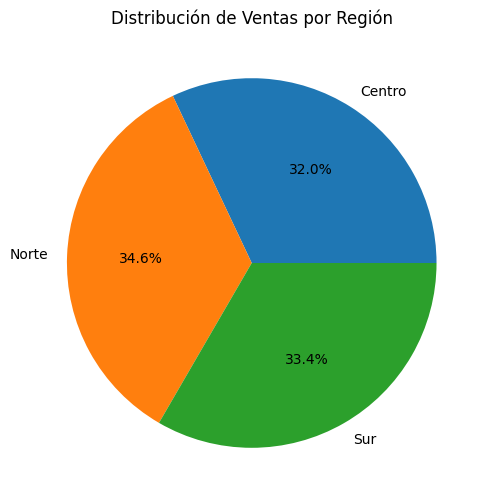

In [ ]:
import matplotlib.pyplot as plt

# Productos más vendidos
productos_mas_vendidos.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

# Ventas por categoría
ventas_categoria = df.groupby('Category')['Total'].sum().sort_values(ascending=False)
ventas_categoria.plot(kind='bar', figsize=(8, 4))
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)
plt.show()

# Ventas por región
ventas_region = df.groupby('Region')['Total'].sum()
ventas_region.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Distribución de Ventas por Región')
plt.ylabel('')
plt.show()


In [ ]:
# Previous code to create and manipulate the DataFrame 'df' ...

# Save the cleaned DataFrame
df.to_csv('ecommerce_sales_data_clean.csv', index=False) # Save the 'cleaned' data

from google.colab import files
files.download('ecommerce_sales_data_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>